In [3]:
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.ticker as tck
#from matplotlib.colors import cnames
from matplotlib import colors as mcolors
import numpy as np
import math

#import brewer2mpl
#bmap = brewer2mpl.get_map('Set2','qualitative',3,reverse=True)
#colors = bmap.mpl_colors
#data.plot('name','value',color=colors,kind='bar')

df = pd.read_csv("Retreat_2018_Feedback.csv", sep = ',', index_col = None)
#df = pd.read_csv("Retreat_2018_Feedback_raw_data.csv", sep = ',', index_col = None)
#print(df)

# Functions

In [925]:
def make_hist(column, name, bar_color):
    
    #warm grey #turquoise
    
    df[column].fillna('Did not use', inplace = True)
    temp = df[column].value_counts().sort_index()
    yint = range(0, math.ceil(max(temp))+1, 5)
    hst = temp.plot(kind = 'bar', yticks = yint, fontsize = 12, color = bar_color,\
                    edgecolor='None', rot = 0, zorder = 100)
    
    hst.yaxis.grid(color = bar_color, linewidth = 0.1, zorder = 0.5)  # grid lines
    hst.set_title(name, fontsize = 20)
    
    l = []
    m = list(df[column])
    
    for entry in m:
        if entry != 'Did not use': 
            l.append(entry)
           
    nparray = np.array(l)
    y = nparray.astype(np.float)
    avg = np.around(np.average(y), decimals = 1)
    total_count = len(nparray)
    hst.tick_params(axis='both', which='major', labelsize=15)
    plt.xlabel("Average : "+str(avg)+"      Total count : "+str(total_count), labelpad=15, fontsize = 17)
    return None



def make_str_hist(column, name, xtick_angle, bar_color):
    
    temp = []
    for entry in df[column]:
        if pd.isna(entry) == False:
            temp.append(entry)
        
    flag = pd.Series(temp).value_counts().sort_index()
    #temp = df[column].value_counts().sort_index()
    yint = range(0, math.ceil(max(flag))+1, 5)
    hst = flag.plot(kind = 'bar', fontsize = 15, color = bar_color,\
                    edgecolor='None', zorder = 100, rot = xtick_angle, yticks = yint)
    #color=(0.2, 0.3, 0.6, 0.6)
    hst.yaxis.grid(color = bar_color, linewidth = 0.1, zorder = 0.5)  
    hst.set_title(name, fontsize = 20)
    total_count = len(df[column])
    
    return None


list_workshops = df['which workshop']
    
workshops = ['Scientific writing', 'Communication', 'Time management',\
             'Networking and career planning', 'Science Slam']
    

def workshop_sort(column, figtitle, bar_color):
    
    temp = []
    subplot_number = 1
    
    fig = plt.figure(num = 3)
    plt.subplots_adjust(right = 2.5, top = 2, wspace = 0.5, hspace = 0.5)
    
    for workshop in workshops:
        for index, entry in enumerate(df[column]):
            if list_workshops[index] == workshop:
                temp.append(entry)
        
        flag = pd.Series(temp).value_counts().sort_index()
        yint = range(0, math.ceil(max(flag))+1, 1)
        
        plot = fig.add_subplot(2, 3, subplot_number)
        
        hst = flag.plot(kind = 'bar', yticks = yint, fontsize = 12, color = bar_color,\
                    edgecolor='None', rot = 0, zorder = 100)
    
        hst.yaxis.grid(color = bar_color, linewidth=0.1, zorder = 0.5)  # grid lines
        hst.set_title(workshop, fontsize = 20)
        plot.tick_params(axis='both', which='major', labelsize=15)
        
        nparray = np.array(temp)
        y = nparray.astype(np.float)
        avg = np.around(np.average(y), decimals = 1)
        total_count = len(temp)
        #hst.set_xlabel("Average : "+str(avg), fontsize = 20)
        plt.xlabel("Average : "+str(avg)+"      Total count : "+str(total_count),\
                   labelpad=15, fontsize = 17)
        
        total_count = len(temp)
        temp = []
        subplot_number = subplot_number + 1
    fig.suptitle(figtitle, x = 1.3, y = 2.4, fontsize = 30 )
    plt.show()
    #plt.savefig('workshop-useful.png', bbox_inches='tight', dpi=200)
    return None


def workshop_str_sort(column, figtitle, bar_color):
    
    temp = []
    subplot_number = 1
    
    fig = plt.figure(num = 3)
    plt.subplots_adjust(right = 2.5, top = 2, wspace = 0.5, hspace = 0.5)
    
    for workshop in workshops:
        for index, entry in enumerate(df[column]):
            if list_workshops[index] == workshop:
                    temp.append(entry)  # it was a string, not an float.
           
        flag = pd.Series(temp).value_counts().sort_index()
        yint = range(0, math.ceil(max(flag))+1, 1)
        
        plot = fig.add_subplot(2, 3, subplot_number)
        
        hst = flag.plot(kind = 'bar', fontsize = 12, color = bar_color,\
                    edgecolor='None', rot = 0, zorder = 100, yticks = yint)
    
        hst.yaxis.grid(color = bar_color, linewidth=0.1, zorder = 0.5)  # grid lines
        hst.set_title(workshop, fontsize = 20)
        plot.tick_params(axis='both', which='major', labelsize = 15)
        
        total_count = len(temp)
        temp = []
        subplot_number = subplot_number + 1
    fig.suptitle(figtitle, x = 1.3, y = 2.4, fontsize = 30 )
    #plt.show()
    plt.savefig('diff-workshop.png',bbox_inches='tight', dpi=200)
    return None

# Hotel

In [844]:
'''
fig = plt.figure(num = 1)

plt.subplots_adjust(right = 2.5, top = 2, wspace = 0.5, hspace = 0.5)
fig.suptitle('Venue and Transportation', x = 1.3 , y = 2.4, fontsize=30 ) 

fig = plt.subplot(231)
make_hist('hotel overall','Hotel Overall')

plt.subplot(232)
make_hist('rooms','Rooms')

plt.subplot(233)
make_hist('food','Food')

plt.subplot(234)
make_hist('spa','Spa Area')

plt.subplot(235)
make_hist('bus','Bus Transfer')

plt.show()
#plt.savefig('hotel.png',bbox_inches='tight',dpi=200)
'''

"\nfig = plt.figure(num = 1)\n\nplt.subplots_adjust(right = 2.5, top = 2, wspace = 0.5, hspace = 0.5)\nfig.suptitle('Venue and Transportation', x = 1.3 , y = 2.4, fontsize=30 ) \n\nfig = plt.subplot(231)\nmake_hist('hotel overall','Hotel Overall')\n\nplt.subplot(232)\nmake_hist('rooms','Rooms')\n\nplt.subplot(233)\nmake_hist('food','Food')\n\nplt.subplot(234)\nmake_hist('spa','Spa Area')\n\nplt.subplot(235)\nmake_hist('bus','Bus Transfer')\n\nplt.show()\n#plt.savefig('hotel.png',bbox_inches='tight',dpi=200)\n"

# First Day

In [843]:
'''
fig = plt.figure(num = 2)
plt.subplots_adjust(right = 2.5, top = 2, wspace = 0.5, hspace = 0.5)
fig.suptitle('First day', x = 1.3 , y = 2.4, fontsize = 30 )

plt.subplot(231)
make_hist('ice breaker','Ice Breaker Event')

plt.subplot(232)
make_hist('social event hike','Social Event (Hike)')

plt.subplot(233)
make_hist('postdocs','Talks by Postdoctoral Researchers')

plt.subplot(234)
make_hist('phd coordinator','Talk by PhD Coordinator')

plt.subplot(235)
make_hist('discussion administration','Discussion with Geschäftsführung')

plt.show()
#plt.savefig('day1.png',bbox_inches='tight',dpi=200)
'''

"\nfig = plt.figure(num = 2)\nplt.subplots_adjust(right = 2.5, top = 2, wspace = 0.5, hspace = 0.5)\nfig.suptitle('First day', x = 1.3 , y = 2.4, fontsize = 30 )\n\nplt.subplot(231)\nmake_hist('ice breaker','Ice Breaker Event')\n\nplt.subplot(232)\nmake_hist('social event hike','Social Event (Hike)')\n\nplt.subplot(233)\nmake_hist('postdocs','Talks by Postdoctoral Researchers')\n\nplt.subplot(234)\nmake_hist('phd coordinator','Talk by PhD Coordinator')\n\nplt.subplot(235)\nmake_hist('discussion administration','Discussion with Geschäftsführung')\n\nplt.show()\n#plt.savefig('day1.png',bbox_inches='tight',dpi=200)\n"

# Workshops

In [913]:
#make_str_hist('which kind', 'If yes, which kind?', 50, 'xkcd:light eggplant')
#plt.show()
#plt.savefig('if_yes_which_kind_workshop.png',bbox_inches='tight',dpi=200)

'''
fig = plt.figure(num = 3)

plt.subplots_adjust(right = 2.5, top = 2, wspace = 0.5, hspace = 0.5)
fig.suptitle('First day', x = 1.3, y = 2.4, fontsize = 30 )

plt.subplot(231)
make_str_hist('workshop useful','Was the workshop useful?', 0, 'xkcd:tan')

plt.subplot(232)
make_str_hist('fulfill expectations','Did it fulfill your expectations?', 0, 'xkcd:tan')

plt.subplot(233)
make_str_hist('enough info beforehand','Did you get enough information beforehand?', 0, 'xkcd:tan')

plt.subplot(234)
make_str_hist('liked to participate in different workshop','Would you have liked to participate in a different workshop?', 0, 'xkcd:tan')

plt.subplot(235)
make_str_hist('which kind','If yes, which kind?', 0, 'xkcd:tan')

plt.show()
#plt.savefig('workshops-feedback.png',bbox_inches='tight',dpi=200)
'''
#workshop_sort('workshop overall', 'Workshops overall', 'xkcd:light green')
#workshop_sort('speaker', 'Speakers', 'xkcd:mauve')
#workshop_sort('topic rating', 'Topic itself', 'xkcd:peach')
#workshop_str_sort('workshop useful','Was the workshop useful?', 'xkcd:sky')
#workshop_str_sort('fulfill expectations', 'Did it fulfill your expectations?', 'xkcd:tan')
#workshop_str_sort('enough info beforehand','Did you get enough information beforehand?', 'xkcd:jungle green')
#workshop_str_sort('liked to participate in different workshop',\
                  #'Would you have liked to participate in a different workshop?', 'xkcd:bordeaux')


"\nfig = plt.figure(num = 3)\n\nplt.subplots_adjust(right = 2.5, top = 2, wspace = 0.5, hspace = 0.5)\nfig.suptitle('First day', x = 1.3, y = 2.4, fontsize = 30 )\n\nplt.subplot(231)\nmake_str_hist('workshop useful','Was the workshop useful?', 0, 'xkcd:tan')\n\nplt.subplot(232)\nmake_str_hist('fulfill expectations','Did it fulfill your expectations?', 0, 'xkcd:tan')\n\nplt.subplot(233)\nmake_str_hist('enough info beforehand','Did you get enough information beforehand?', 0, 'xkcd:tan')\n\nplt.subplot(234)\nmake_str_hist('liked to participate in different workshop','Would you have liked to participate in a different workshop?', 0, 'xkcd:tan')\n\nplt.subplot(235)\nmake_str_hist('which kind','If yes, which kind?', 0, 'xkcd:tan')\n\nplt.show()\n#plt.savefig('workshops-feedback.png',bbox_inches='tight',dpi=200)\n"

# Organization

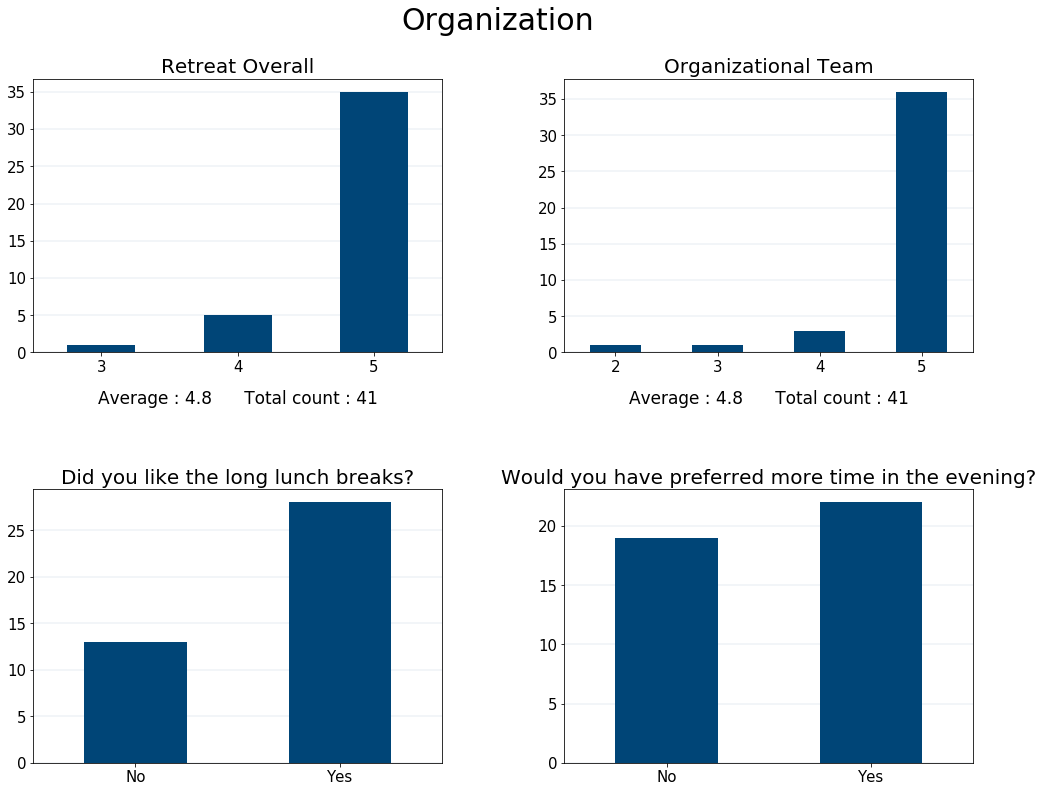

In [927]:
fig = plt.figure()
plt.subplots_adjust(right = 2.3, top = 2.5, wspace = 0.3, hspace = .5)
fig.suptitle('Organization', x = 1.2, y = 2.75, fontsize = 30 )
color = 'xkcd:prussian blue'

plt.subplot(221)
make_hist('retreat overall','Retreat Overall', color)

plt.subplot(222)
make_hist('organisational team','Organizational Team', color)

plt.subplot(223)
make_str_hist('like long lunch break','Did you like the long lunch breaks?', 0, color)

plt.subplot(224)
make_str_hist('preferred more time in the evening','Would you have preferred more time in the evening?', 0, color)

plt.show()
#plt.savefig('orga.png', bbox_inches='tight', dpi=200)